# Dealing with right sckewed distribution of a target variable
### We will try out two dataset:
- energy_consumption_new.csv - has 110 features after dropping high correlation and multicoliniarity
- energy_consumption_clean.csv - has 183 features, all features
### We will try log transformation and handling outliers with IsolatedForest

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import numpy as np 
import pandas as pd 
import pandas as pd
import warnings 
warnings.filterwarnings("ignore")

In [3]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score


In [4]:
df = pd.read_csv('/Users/zhassulan/Desktop/Capstone Project/energy_consumption_new.csv')
df_clean = pd.read_csv('/Users/zhassulan/Desktop/Capstone Project/energy_consumption_clean.csv')


In [5]:
df.shape
df_clean.shape

(6866, 110)

(6866, 183)

### Let's plot our distribution

df with 110 features

Text(0.5, 1.02, 'Distribution of Variables')

<Axes: >

Text(0.5, 1.0, 'User_type')

<Axes: >

Text(0.5, 1.0, 'Start_plugin_hour')

<Axes: >

Text(0.5, 1.0, 'End_plugout_hour')

<Axes: >

Text(0.5, 1.0, 'El_kWh')

<Axes: >

Text(0.5, 1.0, 'Duration_hours')

<Axes: >

Text(0.5, 1.0, 'weekdays_plugin')

<Axes: >

Text(0.5, 1.0, 'Plugin_category')

<Axes: >

Text(0.5, 1.0, 'Duration_category')

<Axes: >

Text(0.5, 1.0, 'clouds')

<Axes: >

Text(0.5, 1.0, 'precip')

<Axes: >

Text(0.5, 1.0, 'pres')

<Axes: >

Text(0.5, 1.0, 'rh')

<Axes: >

Text(0.5, 1.0, 'snow')

<Axes: >

Text(0.5, 1.0, 'Flex_3_6kW')

<Axes: >

Text(0.5, 1.0, 'Garage_ID_AdO1')

<Axes: >

Text(0.5, 1.0, 'Garage_ID_AdO3')

<Axes: >

Text(0.5, 1.0, 'Garage_ID_AsO2')

<Axes: >

Text(0.5, 1.0, 'Garage_ID_AsO6')

<Axes: >

Text(0.5, 1.0, 'Garage_ID_Bl2')

<Axes: >

Text(0.5, 1.0, 'Garage_ID_NR1')

<Axes: >

Text(0.5, 1.0, 'Garage_ID_Ris')

<Axes: >

Text(0.5, 1.0, 'Garage_ID_SR14')

<Axes: >

Text(0.5, 1.0, 'Garage_ID_UT7')

<Axes: >

Text(0.5, 1.0, 'Garage_ID_UT9')

<Axes: >

Text(0.5, 1.0, 'User_ID_AdO1-1')

<Axes: >

Text(0.5, 1.0, 'User_ID_AdO1-2')

<Axes: >

Text(0.5, 1.0, 'User_ID_AdO1-3')

<Axes: >

Text(0.5, 1.0, 'User_ID_AdO1-4')

<Axes: >

Text(0.5, 1.0, 'User_ID_AdO3-1')

<Axes: >

Text(0.5, 1.0, 'User_ID_AdO3-2')

<Axes: >

Text(0.5, 1.0, 'User_ID_AdO3-3')

<Axes: >

Text(0.5, 1.0, 'User_ID_AdO3-4')

<Axes: >

Text(0.5, 1.0, 'User_ID_AsO10-2')

<Axes: >

Text(0.5, 1.0, 'User_ID_AsO10-3')

<Axes: >

Text(0.5, 1.0, 'User_ID_AsO10-4')

<Axes: >

Text(0.5, 1.0, 'User_ID_AsO10-5')

<Axes: >

Text(0.5, 1.0, 'User_ID_AsO2-1')

<Axes: >

Text(0.5, 1.0, 'User_ID_AsO4-3')

<Axes: >

Text(0.5, 1.0, 'User_ID_AsO6-1')

<Axes: >

Text(0.5, 1.0, 'User_ID_AsO8-1')

<Axes: >

Text(0.5, 1.0, 'User_ID_AsO8-2')

<Axes: >

Text(0.5, 1.0, 'User_ID_AsO8-3')

<Axes: >

Text(0.5, 1.0, 'User_ID_Bl2-1')

<Axes: >

Text(0.5, 1.0, 'User_ID_Bl2-2')

<Axes: >

Text(0.5, 1.0, 'User_ID_Bl2-3')

<Axes: >

Text(0.5, 1.0, 'User_ID_Bl2-4')

<Axes: >

Text(0.5, 1.0, 'User_ID_Bl2-5')

<Axes: >

Text(0.5, 1.0, 'User_ID_Bl2-6')

<Axes: >

Text(0.5, 1.0, 'User_ID_Bl2-7')

<Axes: >

Text(0.5, 1.0, 'User_ID_Bl2-8')

<Axes: >

Text(0.5, 1.0, 'User_ID_MS1-1')

<Axes: >

Text(0.5, 1.0, 'User_ID_MS22-1')

<Axes: >

Text(0.5, 1.0, 'User_ID_NR1-1')

<Axes: >

Text(0.5, 1.0, 'User_ID_NR1-2')

<Axes: >

Text(0.5, 1.0, 'User_ID_NR1-3')

<Axes: >

Text(0.5, 1.0, 'User_ID_Ris-1')

<Axes: >

Text(0.5, 1.0, 'User_ID_Ris-2')

<Axes: >

Text(0.5, 1.0, 'User_ID_Ris-3')

<Axes: >

Text(0.5, 1.0, 'User_ID_SR14-1')

<Axes: >

Text(0.5, 1.0, 'User_ID_SR14-2')

<Axes: >

Text(0.5, 1.0, 'User_ID_SR2-1')

<Axes: >

Text(0.5, 1.0, 'User_ID_SR2-2')

<Axes: >

Text(0.5, 1.0, 'User_ID_Share-1')

<Axes: >

Text(0.5, 1.0, 'User_ID_Share-10')

<Axes: >

Text(0.5, 1.0, 'User_ID_Share-11')

<Axes: >

Text(0.5, 1.0, 'User_ID_Share-12')

<Axes: >

Text(0.5, 1.0, 'User_ID_Share-13')

<Axes: >

Text(0.5, 1.0, 'User_ID_Share-14')

<Axes: >

Text(0.5, 1.0, 'User_ID_Share-15')

<Axes: >

Text(0.5, 1.0, 'User_ID_Share-16')

<Axes: >

Text(0.5, 1.0, 'User_ID_Share-17')

<Axes: >

Text(0.5, 1.0, 'User_ID_Share-18')

<Axes: >

Text(0.5, 1.0, 'User_ID_Share-19')

<Axes: >

Text(0.5, 1.0, 'User_ID_Share-2')

<Axes: >

Text(0.5, 1.0, 'User_ID_Share-20')

<Axes: >

Text(0.5, 1.0, 'User_ID_Share-21')

<Axes: >

Text(0.5, 1.0, 'User_ID_Share-22')

<Axes: >

Text(0.5, 1.0, 'User_ID_Share-23')

<Axes: >

Text(0.5, 1.0, 'User_ID_Share-24')

<Axes: >

Text(0.5, 1.0, 'User_ID_Share-25')

<Axes: >

Text(0.5, 1.0, 'User_ID_Share-26')

<Axes: >

Text(0.5, 1.0, 'User_ID_Share-27')

<Axes: >

Text(0.5, 1.0, 'User_ID_Share-28')

<Axes: >

Text(0.5, 1.0, 'User_ID_Share-29')

<Axes: >

Text(0.5, 1.0, 'User_ID_Share-3')

<Axes: >

Text(0.5, 1.0, 'User_ID_Share-30')

<Axes: >

Text(0.5, 1.0, 'User_ID_Share-31')

<Axes: >

Text(0.5, 1.0, 'User_ID_Share-32')

<Axes: >

Text(0.5, 1.0, 'User_ID_Share-33')

<Axes: >

Text(0.5, 1.0, 'User_ID_Share-34')

<Axes: >

Text(0.5, 1.0, 'User_ID_Share-35')

<Axes: >

Text(0.5, 1.0, 'User_ID_Share-36')

<Axes: >

Text(0.5, 1.0, 'User_ID_Share-37')

<Axes: >

Text(0.5, 1.0, 'User_ID_Share-38')

<Axes: >

Text(0.5, 1.0, 'User_ID_Share-39')

<Axes: >

Text(0.5, 1.0, 'User_ID_Share-4')

<Axes: >

Text(0.5, 1.0, 'User_ID_Share-5')

<Axes: >

Text(0.5, 1.0, 'User_ID_Share-6')

<Axes: >

Text(0.5, 1.0, 'User_ID_Share-7')

<Axes: >

Text(0.5, 1.0, 'User_ID_Share-8')

<Axes: >

Text(0.5, 1.0, 'User_ID_Share-9')

<Axes: >

Text(0.5, 1.0, 'User_ID_UT1-2')

<Axes: >

Text(0.5, 1.0, 'User_ID_UT15-1')

<Axes: >

Text(0.5, 1.0, 'User_ID_UT7-1')

<Axes: >

Text(0.5, 1.0, 'User_ID_UT7-2')

<Axes: >

Text(0.5, 1.0, 'User_ID_UT7-3')

<Axes: >

Text(0.5, 1.0, 'User_ID_UT7-5')

<Axes: >

Text(0.5, 1.0, 'End_plugout_week')

<Axes: >

Text(0.5, 1.0, 'End_plugout_minute')

<Axes: >

Text(0.5, 1.0, 'Start_plugin_minute')

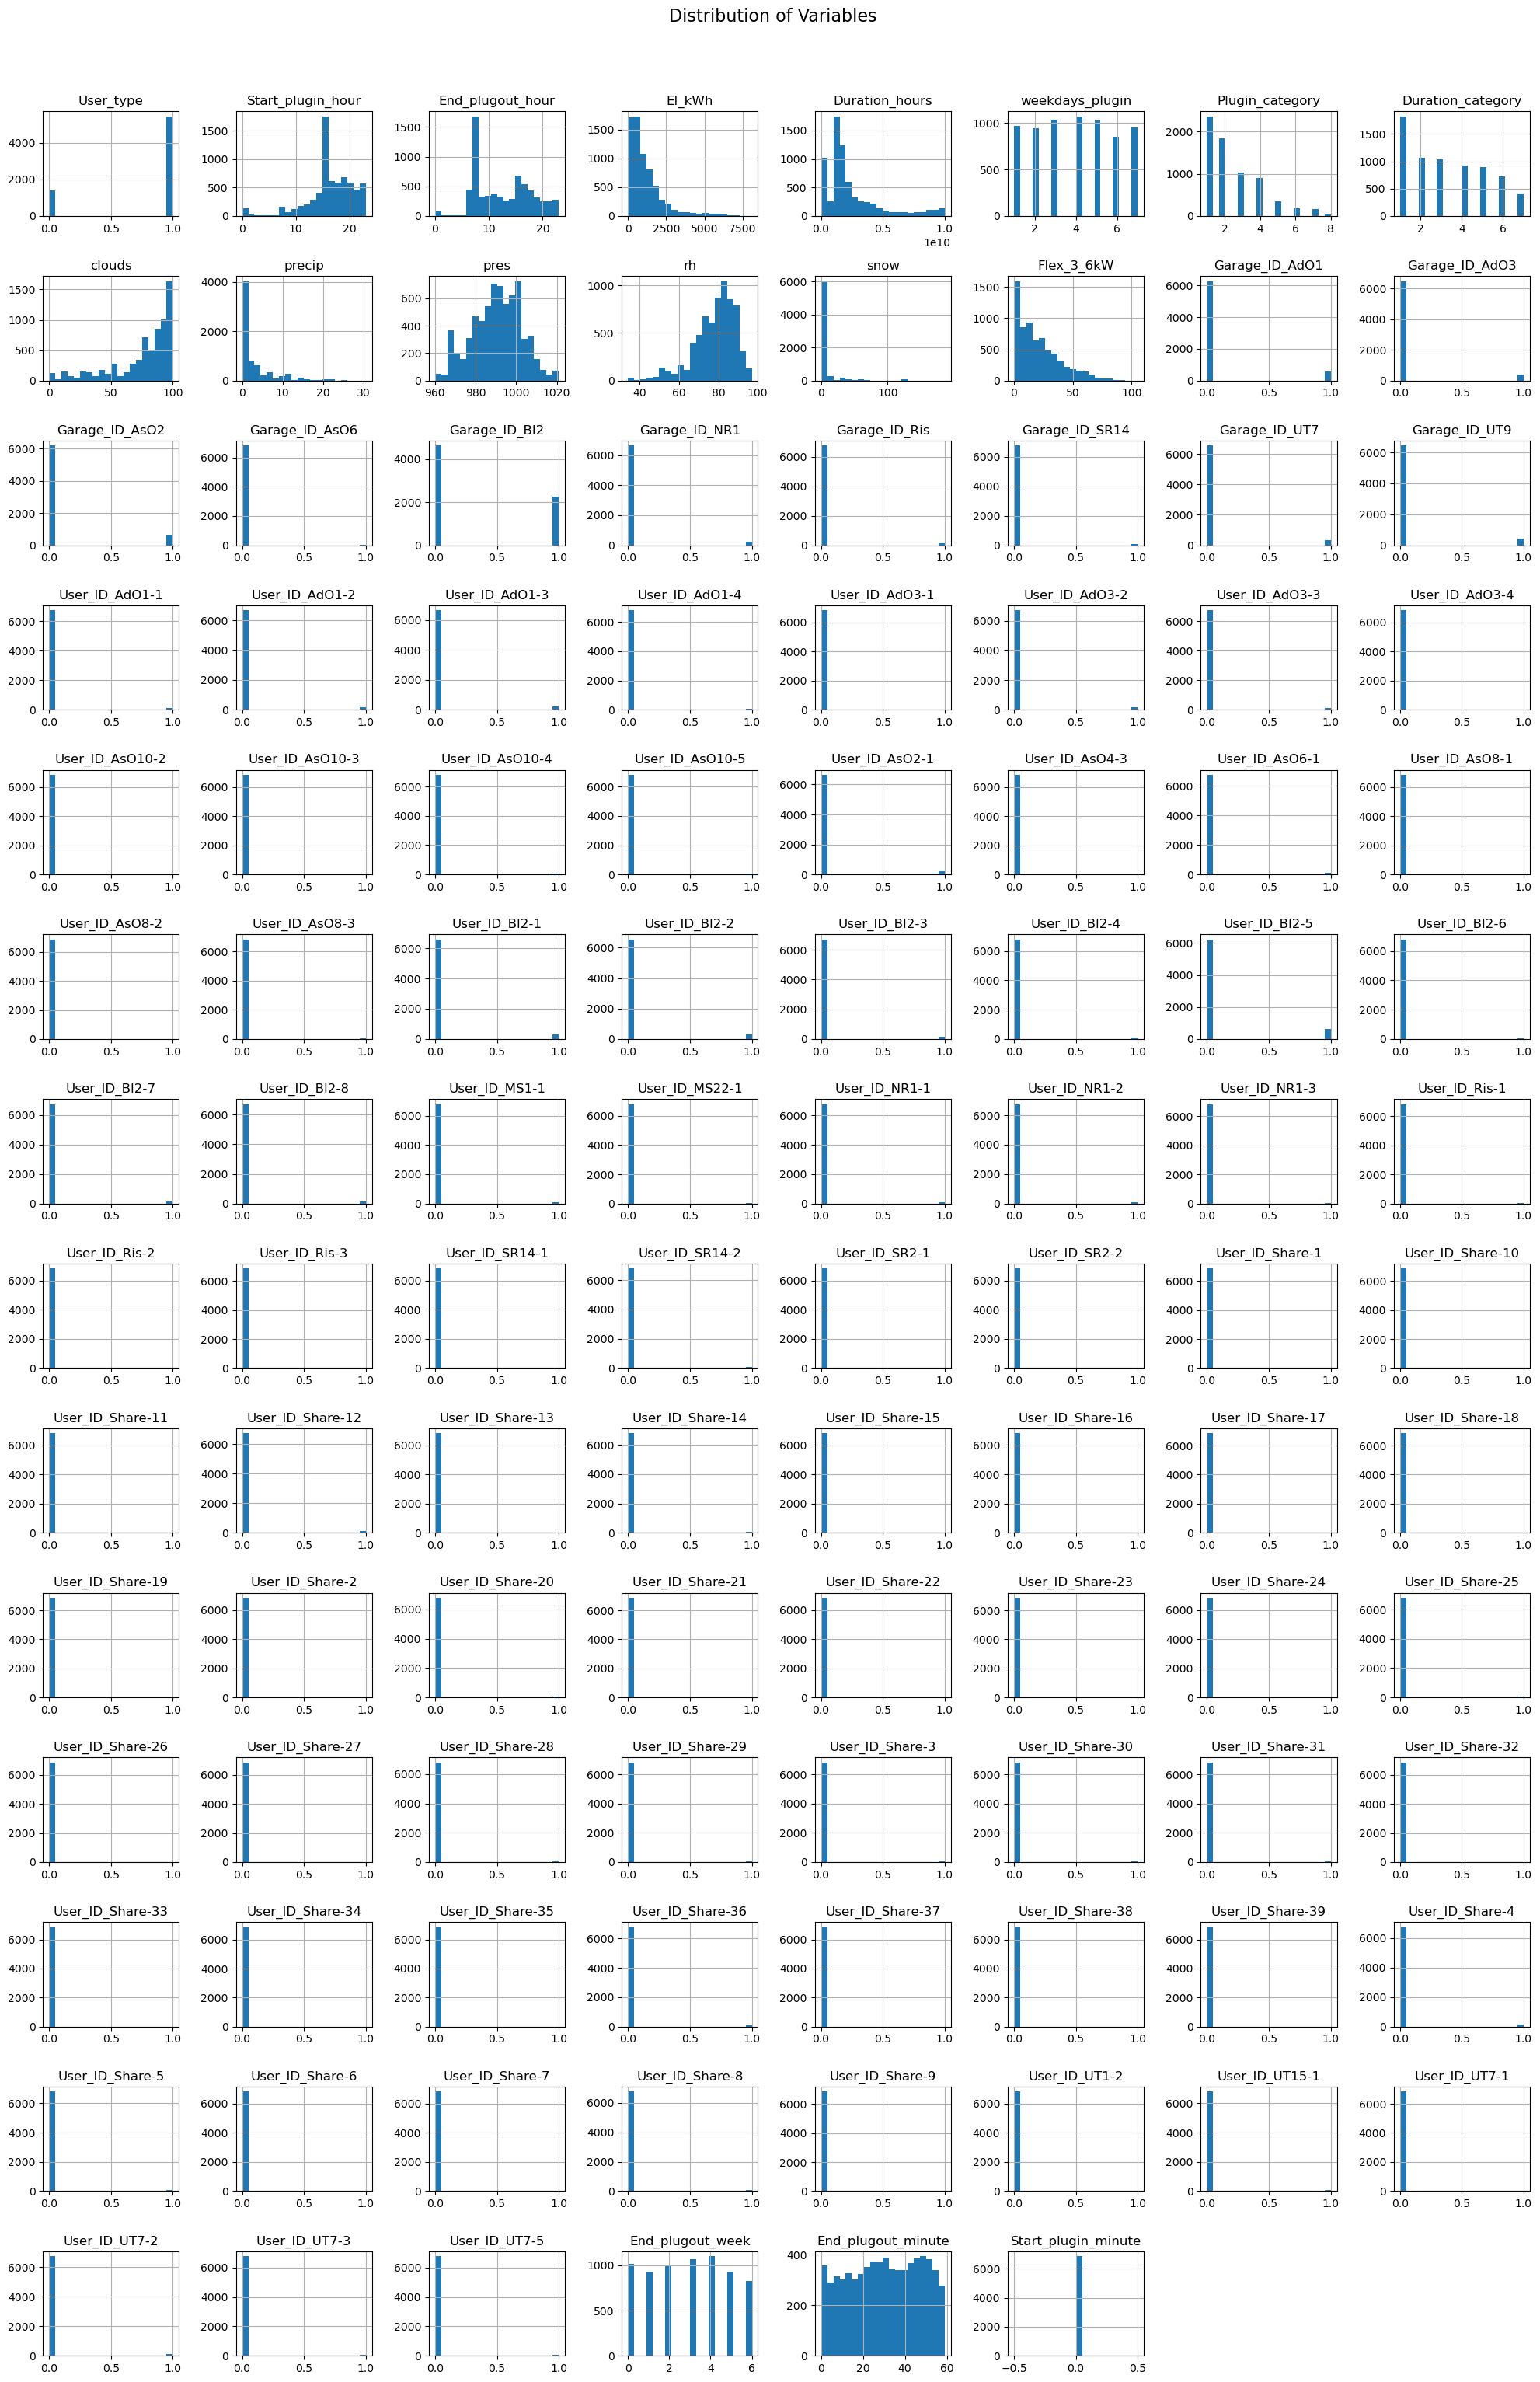

In [6]:
import matplotlib.pyplot as plt

num_features = df.shape[1]
num_cols = 8
num_rows = (num_features // num_cols) + (num_features % num_cols > 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 30))
fig.suptitle("Distribution of Variables", y=1.02, fontsize=16)

axes = axes.flatten()

for i in range(num_features):
    if i < num_features:
        df.iloc[:, i].hist(ax=axes[i], bins=20)
        axes[i].set_title(df.columns[i])

plt.tight_layout()

for j in range(num_features, num_rows * num_cols):
    fig.delaxes(axes[j])

plt.show()


#### We better to use outliers revoming rather than log transformation. As after analyzing dataframe and features, I can see why they are right skewed. We expect them to be so. Because we expect El_kWh to have more low loads rather than big ones and same with duration hours. I assume that Users temt to spend less time to charge their car so why El_kWh and Duration_hours are right skewed. That's also affect Flex_3_6kW...Same we expect from weather features. 


#### Observation:
- Here we can check which features need to be log transformed. 
- 'El_kWh', 'Duration_hours', 'Flex_3_6kW', 'Plugin_category', 'clouds', 'precip', 'snow'

df with 183 features

Text(0.5, 1.02, 'Distribution of Variables')

<Axes: xlabel='session_ID', ylabel='Count'>

Text(0.5, 1.0, 'session_ID')

Text(0.5, 0, '')

<Axes: xlabel='User_type', ylabel='Count'>

Text(0.5, 1.0, 'User_type')

Text(0.5, 0, '')

<Axes: xlabel='Shared_ID', ylabel='Count'>

Text(0.5, 1.0, 'Shared_ID')

Text(0.5, 0, '')

<Axes: xlabel='Start_plugin_hour', ylabel='Count'>

Text(0.5, 1.0, 'Start_plugin_hour')

Text(0.5, 0, '')

<Axes: xlabel='End_plugout_hour', ylabel='Count'>

Text(0.5, 1.0, 'End_plugout_hour')

Text(0.5, 0, '')

<Axes: xlabel='El_kWh', ylabel='Count'>

Text(0.5, 1.0, 'El_kWh')

Text(0.5, 0, '')

<Axes: xlabel='Duration_hours', ylabel='Count'>

Text(0.5, 1.0, 'Duration_hours')

Text(0.5, 0, '')

<Axes: xlabel='month_plugin', ylabel='Count'>

Text(0.5, 1.0, 'month_plugin')

Text(0.5, 0, '')

<Axes: xlabel='weekdays_plugin', ylabel='Count'>

Text(0.5, 1.0, 'weekdays_plugin')

Text(0.5, 0, '')

<Axes: xlabel='Plugin_category', ylabel='Count'>

Text(0.5, 1.0, 'Plugin_category')

Text(0.5, 0, '')

<Axes: xlabel='Duration_category', ylabel='Count'>

Text(0.5, 1.0, 'Duration_category')

Text(0.5, 0, '')

<Axes: xlabel='KROPPAN BRU', ylabel='Count'>

Text(0.5, 1.0, 'KROPPAN BRU')

Text(0.5, 0, '')

<Axes: xlabel='MOHOLTLIA', ylabel='Count'>

Text(0.5, 1.0, 'MOHOLTLIA')

Text(0.5, 0, '')

<Axes: xlabel='SELSBAKK', ylabel='Count'>

Text(0.5, 1.0, 'SELSBAKK')

Text(0.5, 0, '')

<Axes: xlabel='MOHOLT RAMPE 2', ylabel='Count'>

Text(0.5, 1.0, 'MOHOLT RAMPE 2')

Text(0.5, 0, '')

<Axes: xlabel='Jonsvannsveien vest for Steinanvegen', ylabel='Count'>

Text(0.5, 1.0, 'Jonsvannsveien vest for Steinanvegen')

Text(0.5, 0, '')

<Axes: xlabel='clouds', ylabel='Count'>

Text(0.5, 1.0, 'clouds')

Text(0.5, 0, '')

<Axes: xlabel='dewpt', ylabel='Count'>

Text(0.5, 1.0, 'dewpt')

Text(0.5, 0, '')

<Axes: xlabel='dhi', ylabel='Count'>

Text(0.5, 1.0, 'dhi')

Text(0.5, 0, '')

<Axes: xlabel='dni', ylabel='Count'>

Text(0.5, 1.0, 'dni')

Text(0.5, 0, '')

<Axes: xlabel='ghi', ylabel='Count'>

Text(0.5, 1.0, 'ghi')

Text(0.5, 0, '')

<Axes: xlabel='max_dhi', ylabel='Count'>

Text(0.5, 1.0, 'max_dhi')

Text(0.5, 0, '')

<Axes: xlabel='max_dni', ylabel='Count'>

Text(0.5, 1.0, 'max_dni')

Text(0.5, 0, '')

<Axes: xlabel='max_ghi', ylabel='Count'>

Text(0.5, 1.0, 'max_ghi')

Text(0.5, 0, '')

<Axes: xlabel='max_temp', ylabel='Count'>

Text(0.5, 1.0, 'max_temp')

Text(0.5, 0, '')

<Axes: xlabel='max_temp_ts', ylabel='Count'>

Text(0.5, 1.0, 'max_temp_ts')

Text(0.5, 0, '')

<Axes: xlabel='max_uv', ylabel='Count'>

Text(0.5, 1.0, 'max_uv')

Text(0.5, 0, '')

<Axes: xlabel='max_wind_dir', ylabel='Count'>

Text(0.5, 1.0, 'max_wind_dir')

Text(0.5, 0, '')

<Axes: xlabel='max_wind_spd', ylabel='Count'>

Text(0.5, 1.0, 'max_wind_spd')

Text(0.5, 0, '')

<Axes: xlabel='max_wind_spd_ts', ylabel='Count'>

Text(0.5, 1.0, 'max_wind_spd_ts')

Text(0.5, 0, '')

<Axes: xlabel='min_temp', ylabel='Count'>

Text(0.5, 1.0, 'min_temp')

Text(0.5, 0, '')

<Axes: xlabel='min_temp_ts', ylabel='Count'>

Text(0.5, 1.0, 'min_temp_ts')

Text(0.5, 0, '')

<Axes: xlabel='precip', ylabel='Count'>

Text(0.5, 1.0, 'precip')

Text(0.5, 0, '')

<Axes: xlabel='precip_gpm', ylabel='Count'>

Text(0.5, 1.0, 'precip_gpm')

Text(0.5, 0, '')

<Axes: xlabel='pres', ylabel='Count'>

Text(0.5, 1.0, 'pres')

Text(0.5, 0, '')

<Axes: xlabel='rh', ylabel='Count'>

Text(0.5, 1.0, 'rh')

Text(0.5, 0, '')

<Axes: xlabel='slp', ylabel='Count'>

Text(0.5, 1.0, 'slp')

Text(0.5, 0, '')

<Axes: xlabel='snow', ylabel='Count'>

Text(0.5, 1.0, 'snow')

Text(0.5, 0, '')

<Axes: xlabel='solar_rad', ylabel='Count'>

Text(0.5, 1.0, 'solar_rad')

Text(0.5, 0, '')

<Axes: xlabel='t_dhi', ylabel='Count'>

Text(0.5, 1.0, 't_dhi')

Text(0.5, 0, '')

<Axes: xlabel='t_dni', ylabel='Count'>

Text(0.5, 1.0, 't_dni')

Text(0.5, 0, '')

<Axes: xlabel='t_ghi', ylabel='Count'>

Text(0.5, 1.0, 't_ghi')

Text(0.5, 0, '')

<Axes: xlabel='t_solar_rad', ylabel='Count'>

Text(0.5, 1.0, 't_solar_rad')

Text(0.5, 0, '')

<Axes: xlabel='temp', ylabel='Count'>

Text(0.5, 1.0, 'temp')

Text(0.5, 0, '')

<Axes: xlabel='ts', ylabel='Count'>

Text(0.5, 1.0, 'ts')

Text(0.5, 0, '')

<Axes: xlabel='wind_dir', ylabel='Count'>

Text(0.5, 1.0, 'wind_dir')

Text(0.5, 0, '')

<Axes: xlabel='wind_gust_spd', ylabel='Count'>

Text(0.5, 1.0, 'wind_gust_spd')

Text(0.5, 0, '')

<Axes: xlabel='wind_spd', ylabel='Count'>

Text(0.5, 1.0, 'wind_spd')

Text(0.5, 0, '')

<Axes: xlabel='n_private', ylabel='Count'>

Text(0.5, 1.0, 'n_private')

Text(0.5, 0, '')

<Axes: xlabel='Flex_3_6kW', ylabel='Count'>

Text(0.5, 1.0, 'Flex_3_6kW')

Text(0.5, 0, '')

<Axes: xlabel='Flex_7_2kW', ylabel='Count'>

Text(0.5, 1.0, 'Flex_7_2kW')

Text(0.5, 0, '')

<Axes: xlabel='n_shared', ylabel='Count'>

Text(0.5, 1.0, 'n_shared')

Text(0.5, 0, '')

<Axes: xlabel='AMS_kWh', ylabel='Count'>

Text(0.5, 1.0, 'AMS_kWh')

Text(0.5, 0, '')

<Axes: xlabel='Simultaneous_if_3_6kW', ylabel='Count'>

Text(0.5, 1.0, 'Simultaneous_if_3_6kW')

Text(0.5, 0, '')

<Axes: xlabel='Synthetic_3_6kW', ylabel='Count'>

Text(0.5, 1.0, 'Synthetic_3_6kW')

Text(0.5, 0, '')

<Axes: xlabel='Synthetic_7_2kW', ylabel='Count'>

Text(0.5, 1.0, 'Synthetic_7_2kW')

Text(0.5, 0, '')

<Axes: xlabel='Garage_ID_AdA6', ylabel='Count'>

Text(0.5, 1.0, 'Garage_ID_AdA6')

Text(0.5, 0, '')

<Axes: xlabel='Garage_ID_AdO1', ylabel='Count'>

Text(0.5, 1.0, 'Garage_ID_AdO1')

Text(0.5, 0, '')

<Axes: xlabel='Garage_ID_AdO3', ylabel='Count'>

Text(0.5, 1.0, 'Garage_ID_AdO3')

Text(0.5, 0, '')

<Axes: xlabel='Garage_ID_AsO10', ylabel='Count'>

Text(0.5, 1.0, 'Garage_ID_AsO10')

Text(0.5, 0, '')

<Axes: xlabel='Garage_ID_AsO2', ylabel='Count'>

Text(0.5, 1.0, 'Garage_ID_AsO2')

Text(0.5, 0, '')

<Axes: xlabel='Garage_ID_AsO4', ylabel='Count'>

Text(0.5, 1.0, 'Garage_ID_AsO4')

Text(0.5, 0, '')

<Axes: xlabel='Garage_ID_AsO6', ylabel='Count'>

Text(0.5, 1.0, 'Garage_ID_AsO6')

Text(0.5, 0, '')

<Axes: xlabel='Garage_ID_AsO8', ylabel='Count'>

Text(0.5, 1.0, 'Garage_ID_AsO8')

Text(0.5, 0, '')

<Axes: xlabel='Garage_ID_Bl2', ylabel='Count'>

Text(0.5, 1.0, 'Garage_ID_Bl2')

Text(0.5, 0, '')

<Axes: xlabel='Garage_ID_Bl7', ylabel='Count'>

Text(0.5, 1.0, 'Garage_ID_Bl7')

Text(0.5, 0, '')

<Axes: xlabel='Garage_ID_MS1', ylabel='Count'>

Text(0.5, 1.0, 'Garage_ID_MS1')

Text(0.5, 0, '')

<Axes: xlabel='Garage_ID_MS11', ylabel='Count'>

Text(0.5, 1.0, 'Garage_ID_MS11')

Text(0.5, 0, '')

<Axes: xlabel='Garage_ID_MS22', ylabel='Count'>

Text(0.5, 1.0, 'Garage_ID_MS22')

Text(0.5, 0, '')

<Axes: xlabel='Garage_ID_NR1', ylabel='Count'>

Text(0.5, 1.0, 'Garage_ID_NR1')

Text(0.5, 0, '')

<Axes: xlabel='Garage_ID_Ris', ylabel='Count'>

Text(0.5, 1.0, 'Garage_ID_Ris')

Text(0.5, 0, '')

<Axes: xlabel='Garage_ID_SR14', ylabel='Count'>

Text(0.5, 1.0, 'Garage_ID_SR14')

Text(0.5, 0, '')

<Axes: xlabel='Garage_ID_SR2', ylabel='Count'>

Text(0.5, 1.0, 'Garage_ID_SR2')

Text(0.5, 0, '')

<Axes: xlabel='Garage_ID_SR4', ylabel='Count'>

Text(0.5, 1.0, 'Garage_ID_SR4')

Text(0.5, 0, '')

<Axes: xlabel='Garage_ID_UT1', ylabel='Count'>

Text(0.5, 1.0, 'Garage_ID_UT1')

Text(0.5, 0, '')

<Axes: xlabel='Garage_ID_UT15', ylabel='Count'>

Text(0.5, 1.0, 'Garage_ID_UT15')

Text(0.5, 0, '')

<Axes: xlabel='Garage_ID_UT2', ylabel='Count'>

Text(0.5, 1.0, 'Garage_ID_UT2')

Text(0.5, 0, '')

<Axes: xlabel='Garage_ID_UT7', ylabel='Count'>

Text(0.5, 1.0, 'Garage_ID_UT7')

Text(0.5, 0, '')

<Axes: xlabel='Garage_ID_UT9', ylabel='Count'>

Text(0.5, 1.0, 'Garage_ID_UT9')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_AdA6-1', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_AdA6-1')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_AdO1-1', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_AdO1-1')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_AdO1-2', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_AdO1-2')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_AdO1-3', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_AdO1-3')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_AdO1-4', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_AdO1-4')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_AdO3-1', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_AdO3-1')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_AdO3-2', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_AdO3-2')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_AdO3-3', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_AdO3-3')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_AdO3-4', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_AdO3-4')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_AsO10-1', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_AsO10-1')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_AsO10-2', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_AsO10-2')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_AsO10-3', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_AsO10-3')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_AsO10-4', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_AsO10-4')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_AsO10-5', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_AsO10-5')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_AsO2-1', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_AsO2-1')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_AsO4-1', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_AsO4-1')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_AsO4-2', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_AsO4-2')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_AsO4-3', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_AsO4-3')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_AsO6-1', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_AsO6-1')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_AsO8-1', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_AsO8-1')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_AsO8-2', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_AsO8-2')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_AsO8-3', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_AsO8-3')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_AsO8-4', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_AsO8-4')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_Bl2-1', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_Bl2-1')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_Bl2-2', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_Bl2-2')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_Bl2-3', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_Bl2-3')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_Bl2-4', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_Bl2-4')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_Bl2-5', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_Bl2-5')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_Bl2-6', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_Bl2-6')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_Bl2-7', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_Bl2-7')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_Bl2-8', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_Bl2-8')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_Bl7-1', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_Bl7-1')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_MS1-1', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_MS1-1')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_MS1-2', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_MS1-2')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_MS11-1', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_MS11-1')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_MS22-1', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_MS22-1')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_NR1-1', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_NR1-1')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_NR1-2', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_NR1-2')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_NR1-3', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_NR1-3')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_Ris-1', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_Ris-1')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_Ris-2', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_Ris-2')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_Ris-3', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_Ris-3')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_SR14-1', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_SR14-1')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_SR14-2', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_SR14-2')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_SR2-1', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_SR2-1')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_SR2-2', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_SR2-2')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_SR2-3', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_SR2-3')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_SR4-1', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_SR4-1')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_Share-1', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_Share-1')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_Share-10', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_Share-10')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_Share-11', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_Share-11')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_Share-12', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_Share-12')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_Share-13', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_Share-13')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_Share-14', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_Share-14')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_Share-15', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_Share-15')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_Share-16', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_Share-16')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_Share-17', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_Share-17')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_Share-18', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_Share-18')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_Share-19', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_Share-19')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_Share-2', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_Share-2')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_Share-20', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_Share-20')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_Share-21', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_Share-21')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_Share-22', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_Share-22')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_Share-23', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_Share-23')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_Share-24', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_Share-24')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_Share-25', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_Share-25')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_Share-26', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_Share-26')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_Share-27', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_Share-27')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_Share-28', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_Share-28')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_Share-29', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_Share-29')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_Share-3', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_Share-3')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_Share-30', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_Share-30')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_Share-31', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_Share-31')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_Share-32', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_Share-32')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_Share-33', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_Share-33')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_Share-34', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_Share-34')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_Share-35', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_Share-35')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_Share-36', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_Share-36')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_Share-37', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_Share-37')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_Share-38', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_Share-38')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_Share-39', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_Share-39')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_Share-4', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_Share-4')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_Share-5', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_Share-5')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_Share-6', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_Share-6')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_Share-7', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_Share-7')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_Share-8', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_Share-8')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_Share-9', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_Share-9')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_UT1-1', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_UT1-1')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_UT1-2', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_UT1-2')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_UT15-1', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_UT15-1')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_UT15-2', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_UT15-2')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_UT2-1', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_UT2-1')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_UT7-1', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_UT7-1')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_UT7-2', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_UT7-2')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_UT7-3', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_UT7-3')

Text(0.5, 0, '')

<Axes: xlabel='User_ID_UT7-5', ylabel='Count'>

Text(0.5, 1.0, 'User_ID_UT7-5')

Text(0.5, 0, '')

<Axes: xlabel='End_plugout_year', ylabel='Count'>

Text(0.5, 1.0, 'End_plugout_year')

Text(0.5, 0, '')

<Axes: xlabel='End_plugout_month', ylabel='Count'>

Text(0.5, 1.0, 'End_plugout_month')

Text(0.5, 0, '')

<Axes: xlabel='End_plugout_week', ylabel='Count'>

Text(0.5, 1.0, 'End_plugout_week')

Text(0.5, 0, '')

<Axes: xlabel='End_plugout_day', ylabel='Count'>

Text(0.5, 1.0, 'End_plugout_day')

Text(0.5, 0, '')

<Axes: xlabel='End_plugout_minute', ylabel='Count'>

Text(0.5, 1.0, 'End_plugout_minute')

Text(0.5, 0, '')

<Axes: xlabel='Start_plugin_year', ylabel='Count'>

Text(0.5, 1.0, 'Start_plugin_year')

Text(0.5, 0, '')

<Axes: xlabel='Start_plugin_day', ylabel='Count'>

Text(0.5, 1.0, 'Start_plugin_day')

Text(0.5, 0, '')

<Axes: xlabel='Start_plugin_minute', ylabel='Count'>

Text(0.5, 1.0, 'Start_plugin_minute')

Text(0.5, 0, '')

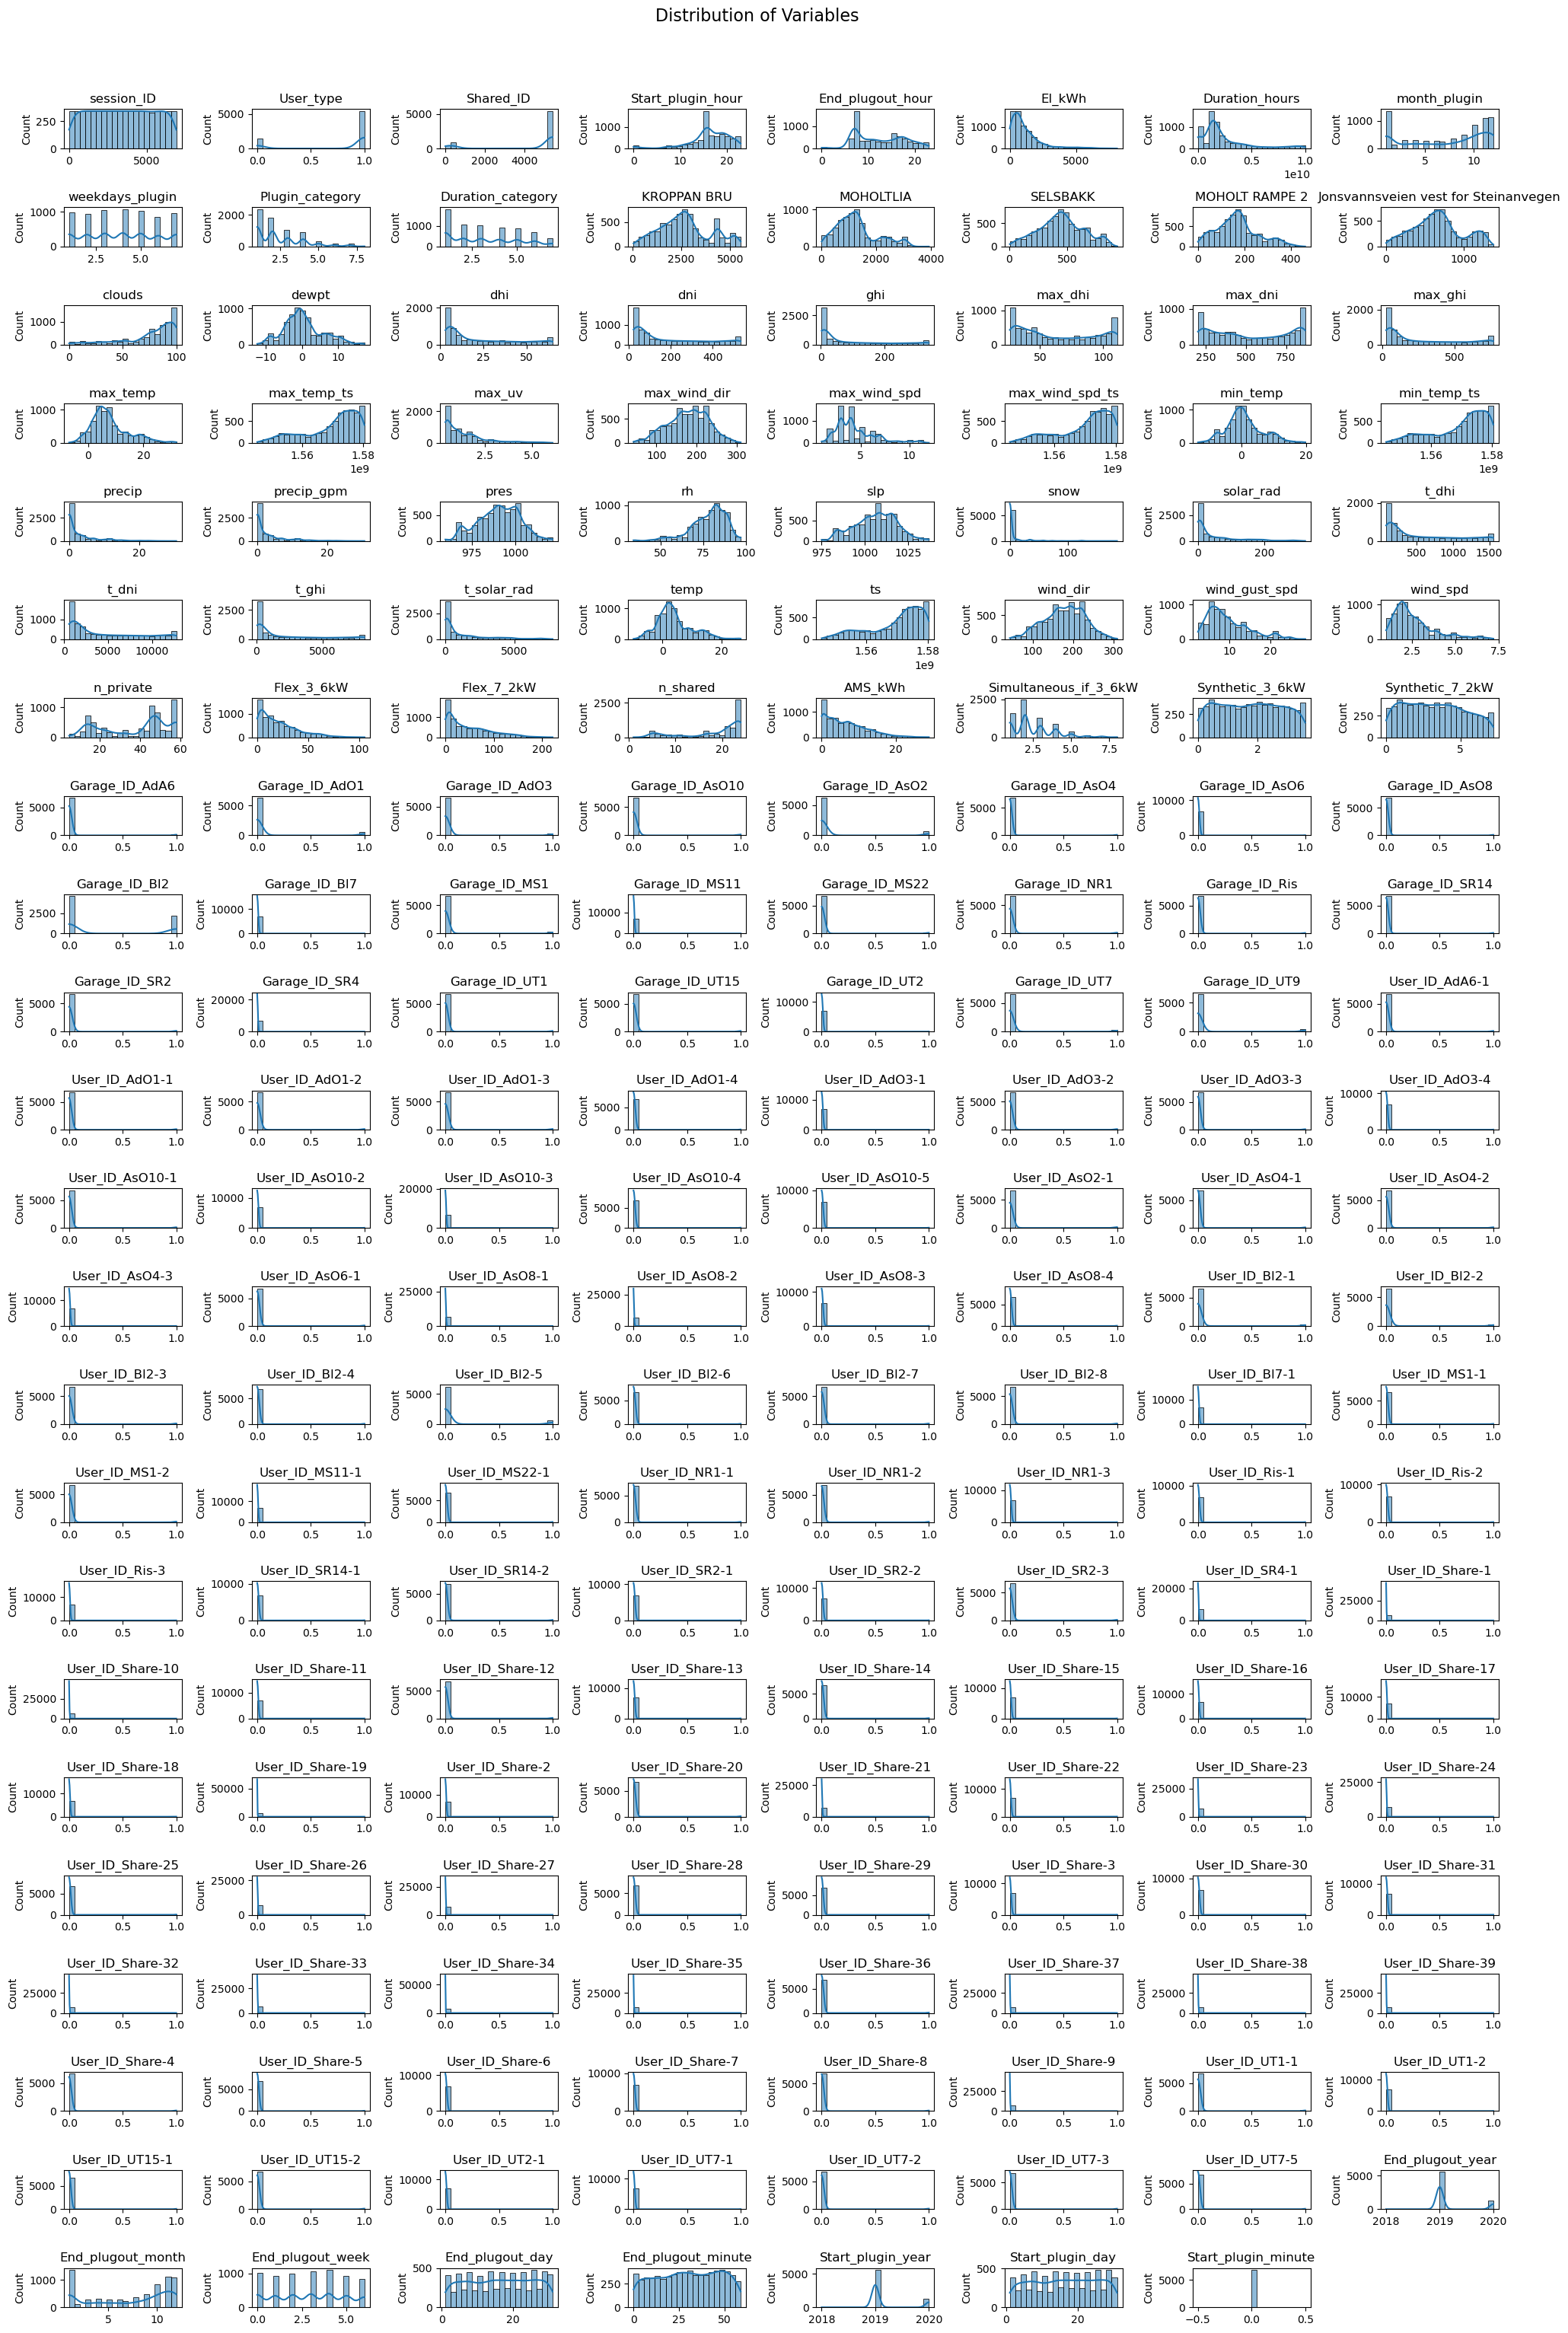

In [7]:
num_features = df_clean.shape[1]
num_cols = 8  
num_rows = (num_features // num_cols) + (num_features % num_cols > 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 30))
fig.suptitle("Distribution of Variables", y=1.02, fontsize=16)

axes = axes.flatten()

for i in range(num_features):
    if i < num_features:
        sns.histplot(df_clean.iloc[:, i], ax=axes[i], bins=20, kde=True)  # Using seaborn for better visualizations
        axes[i].set_title(df_clean.columns[i])
        axes[i].set_xlabel('')

plt.tight_layout()

for j in range(num_features, num_rows * num_cols):
    fig.delaxes(axes[j])

plt.show()


We will do same as we did with df 110 features.

#### Same interpretation as with distribution of df with 110 features.

### 1. But Let's apply log transformation and check how it performs, then we can try deal with outliers.
- df with 110 features first

- WE can apply log transformation +1 for our skewed distributions 
- The np.log1p function is often preferred over np.log for features that may contain zeros, as it handles zero values gracefully.

In [8]:
df_log = df.copy()

In [9]:
# Applying log transformation

selected_features = ['El_kWh', 'Duration_hours', 'Flex_3_6kW', 'Plugin_category', 'clouds', 'precip', 'snow']

df_log[selected_features] = np.log1p(df_log[selected_features])



In [10]:
df_log.isna().sum()

User_type              0
Start_plugin_hour      0
End_plugout_hour       0
El_kWh                 0
Duration_hours         0
                      ..
User_ID_UT7-3          0
User_ID_UT7-5          0
End_plugout_week       0
End_plugout_minute     0
Start_plugin_minute    0
Length: 110, dtype: int64

In [11]:
df_log.shape

(6866, 110)

# Sanity Check

array([[<Axes: title={'center': 'El_kWh'}>,
        <Axes: title={'center': 'Duration_hours'}>,
        <Axes: title={'center': 'Flex_3_6kW'}>],
       [<Axes: title={'center': 'Plugin_category'}>,
        <Axes: title={'center': 'clouds'}>,
        <Axes: title={'center': 'precip'}>],
       [<Axes: title={'center': 'snow'}>, <Axes: >, <Axes: >]],
      dtype=object)

Text(0.5, 1.02, 'Histograms of Transformed Variables')

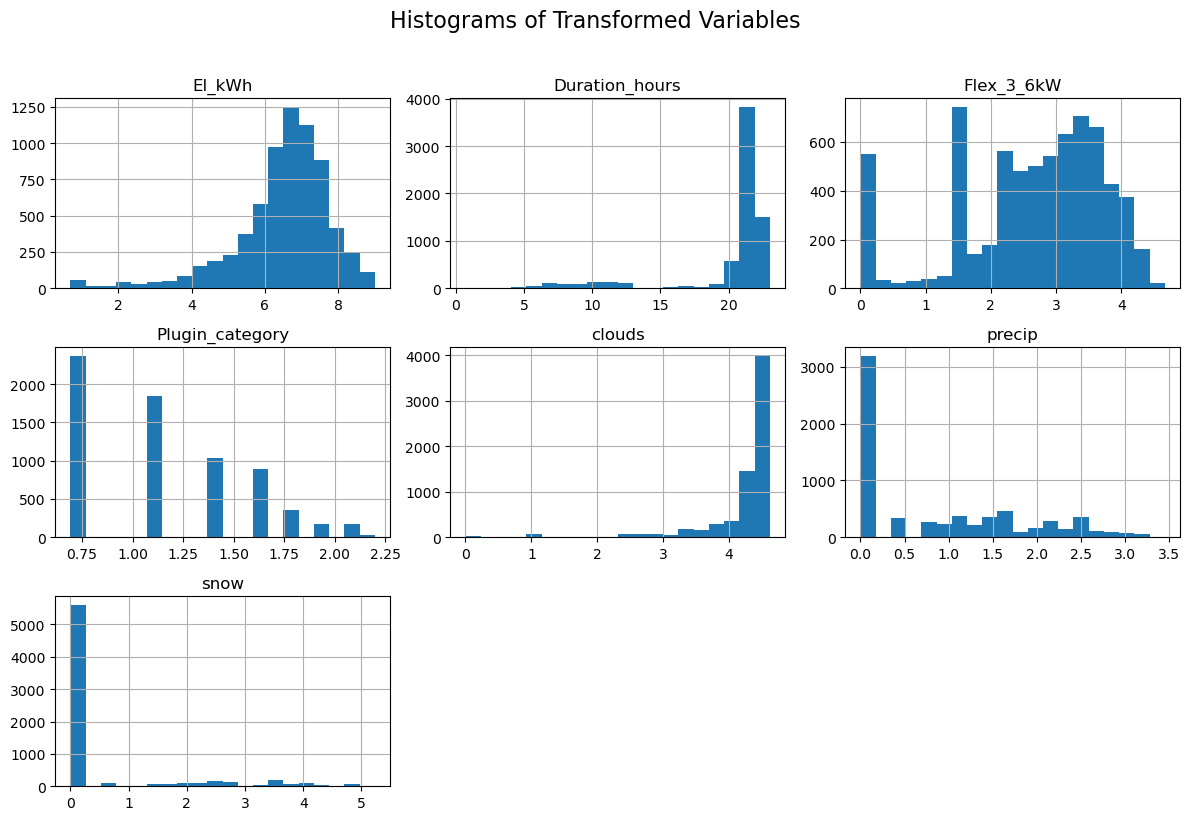

In [12]:
df_log[['El_kWh', 'Duration_hours', 'Flex_3_6kW', 'Plugin_category', 'clouds', 'precip', 'snow']].hist(figsize=(12, 8), bins=20)
plt.suptitle("Histograms of Transformed Variables", y=1.02, fontsize=16)
plt.tight_layout()

plt.show()

I was expecting better result but We can work with this.

In [13]:
# Preparing our data for a machine learning model
X_log = df_log.drop('El_kWh', axis=1)
y_log = df_log['El_kWh']

# Taking a chuck for our 20% test set
X_remainder_log, X_test_log, y_remainder_log, y_test_log = \
    train_test_split(X_log, y_log, test_size=0.2, random_state=1)

# Splitting the remainder in two chunks
X_train_log, X_validation_log, y_train_log, y_validation_log = \
    train_test_split(X_remainder_log, y_remainder_log, test_size = 0.3,
                     random_state=1)

Lets fit our models

In [14]:
# Baseline Linear Regression
baseline_model_log = LinearRegression()
baseline_model_log.fit(X_train_log, y_train_log)

# Evaluate baseline model
y_pred_baseline_log = baseline_model_log.predict(X_validation_log)
mse_baseline_log = mean_squared_error(y_validation_log, y_pred_baseline_log)
print("Baseline Mean Squared Error on Validation Set:", mse_baseline_log)
r2_baseline_log = r2_score(y_validation_log, y_pred_baseline_log)
print(f"r2 on Validation Set: {r2_baseline_log}")

LinearRegression()

Baseline Mean Squared Error on Validation Set: 1.3402467182755882
r2 on Validation Set: 0.23798240104395696


In [15]:
# Create and fit the RandomForestRegressor model on log-transformed data
model_log = RandomForestRegressor()
model_log.fit(X_train_log, y_train_log)

# Make predictions on the validation set
y_pred_log = model_log.predict(X_validation_log)

# Calculate mean squared error on the validation set
mse_log = mean_squared_error(y_validation_log, y_pred_log)
print(f"Mean Squared Error on Validation Set (log-transformed): {mse_log}")

r2_log = r2_score(y_validation_log, y_pred_log)  # Calculate R2 Score
print(f"R2 on Validation Set (log-transformed): {r2_log}")



RandomForestRegressor()

Mean Squared Error on Validation Set (log-transformed): 1.0490084388227603
R2 on Validation Set (log-transformed): 0.40357034198536423


WE can see that Random Forest perporms better than Linear Regression.

## But lets check df_clean with log transformation now

In [16]:
df_clean_log = df_clean.copy()

In [17]:
# Applying log transformation on df_clean

selected_features = ['El_kWh', 'Duration_hours', 'dni', 'dhi', 'ghi', 'max_uv', 'max_wind_spd_ts',
                     'min_temp_ts', 'precip_gpm', 't_dhi', 't_solar_rad', 'ts', 'wind_gust_spd',
                     'wind_spd', 'Flex_7_2kW', 'AMS_kWh','Flex_3_6kW', 'Plugin_category', 'clouds', 
                     'precip', 'snow']

df_clean_log[selected_features] = np.log1p(df_clean_log[selected_features])



In [18]:
df_clean_log.isna().sum()

session_ID             0
User_type              0
Shared_ID              0
Start_plugin_hour      0
End_plugout_hour       0
                      ..
End_plugout_day        0
End_plugout_minute     0
Start_plugin_year      0
Start_plugin_day       0
Start_plugin_minute    0
Length: 183, dtype: int64

In [19]:
df_clean_log.shape

(6866, 183)

#### Sanity check

array([[<Axes: title={'center': 'El_kWh'}>,
        <Axes: title={'center': 'Duration_hours'}>,
        <Axes: title={'center': 'dni'}>, <Axes: title={'center': 'dhi'}>,
        <Axes: title={'center': 'ghi'}>],
       [<Axes: title={'center': 'max_uv'}>,
        <Axes: title={'center': 'max_wind_spd_ts'}>,
        <Axes: title={'center': 'min_temp_ts'}>,
        <Axes: title={'center': 'precip_gpm'}>,
        <Axes: title={'center': 't_dhi'}>],
       [<Axes: title={'center': 't_solar_rad'}>,
        <Axes: title={'center': 'ts'}>,
        <Axes: title={'center': 'wind_gust_spd'}>,
        <Axes: title={'center': 'wind_spd'}>,
        <Axes: title={'center': 'Flex_7_2kW'}>],
       [<Axes: title={'center': 'AMS_kWh'}>,
        <Axes: title={'center': 'Flex_3_6kW'}>,
        <Axes: title={'center': 'Plugin_category'}>,
        <Axes: title={'center': 'clouds'}>,
        <Axes: title={'center': 'precip'}>],
       [<Axes: title={'center': 'snow'}>, <Axes: >, <Axes: >, <Axes: >,
        

Text(0.5, 1.02, 'Histograms of Transformed Variables')

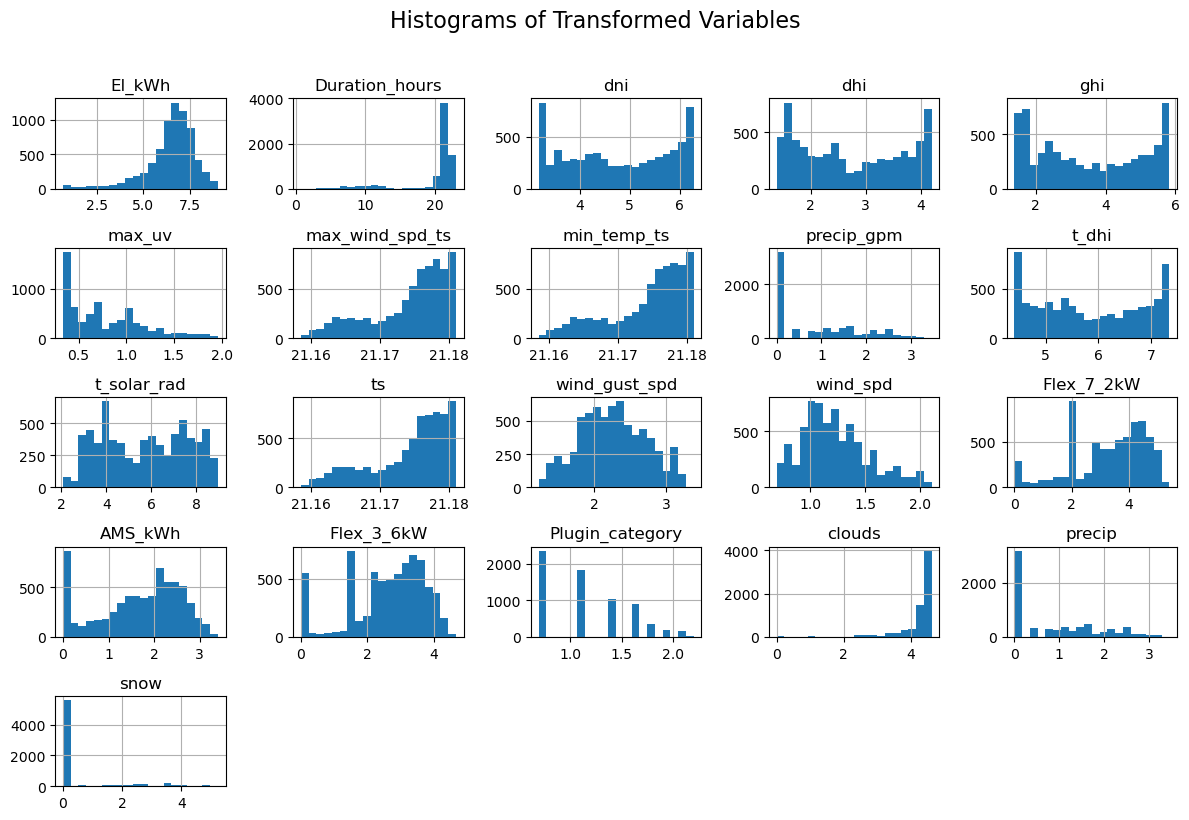

In [20]:
df_clean_log[['El_kWh', 'Duration_hours', 'dni', 'dhi', 'ghi', 'max_uv', 'max_wind_spd_ts',
                     'min_temp_ts', 'precip_gpm', 't_dhi', 't_solar_rad', 'ts', 'wind_gust_spd',
                     'wind_spd', 'Flex_7_2kW', 'AMS_kWh','Flex_3_6kW', 'Plugin_category', 'clouds', 
                     'precip', 'snow']].hist(figsize=(12, 8), bins=20)
plt.suptitle("Histograms of Transformed Variables", y=1.02, fontsize=16)
plt.tight_layout()

plt.show()

We can see improvements. 

Let's run our models

In [21]:
# Preparing our data for a machine learning model
X_clean_log = df_clean_log.drop('El_kWh', axis=1)
y_clean_log = df_clean_log['El_kWh']

# Taking a chuck for our 20% test set
X_remainder_clean_log, X_test_clean_log, y_remainder_clean_log, y_test_clean_log = \
    train_test_split(X_clean_log, y_clean_log, test_size=0.2, random_state=1)

# Splitting the remainder in two chunks
X_train_clean_log, X_validation_clean_log, y_train_clean_log, y_validation_clean_log = \
    train_test_split(X_remainder_clean_log, y_remainder_clean_log, test_size = 0.3,
                     random_state=1)

Lets fit our models

In [22]:
# Baseline Linear Regression
baseline_model_clean_log = LinearRegression()
baseline_model_clean_log.fit(X_train_clean_log, y_train_clean_log)

# Evaluate baseline model
y_pred_baseline_clean_log = baseline_model_clean_log.predict(X_validation_clean_log)
mse_baseline_clean_log = mean_squared_error(y_validation_clean_log, y_pred_baseline_clean_log)
print("Baseline Mean Squared Error on Validation Set:", mse_baseline_clean_log)
r2_clean_log = r2_score(y_validation_clean_log, y_pred_baseline_clean_log)
print(f"r2 on Validation Set: {r2_clean_log}")

LinearRegression()

Baseline Mean Squared Error on Validation Set: 1.1305400102935834
r2 on Validation Set: 0.3572143304509756


In [23]:
# Create and fit the RandomForestRegressor model
model_clean_log = RandomForestRegressor()
model_clean_log.fit(X_train_clean_log, y_train_clean_log)

# Make predictions on the validation set
y_pred_clean_log = model_clean_log.predict(X_validation_clean_log)

# Calculate mean squared error on the validation set
mse_clean_log = mean_squared_error(y_validation_clean_log, y_pred_clean_log)
print(f"Mean Squared Error on Validation Set: {mse_clean_log}")
r2_clean_log = r2_score(y_validation_clean_log, y_pred_clean_log)  # Calculate R2 Score
print(f"r2 on Validation Set: {r2_clean_log}")


RandomForestRegressor()

Mean Squared Error on Validation Set: 0.8763827343828671
r2 on Validation Set: 0.5017193044276168


We can see better result on df_clean with 183 features.

And again, Random Forest perform better than Linear.

### Random Forest Regressor is more robust in handling outliers and is less sensitive to multicollinearity compared to linear regression. 
- Random Forest can capture non-linear relationships between features and the target variable because each decision tree can model complex patterns independently. The ensemble then combines these patterns to provide a more flexible overall model.
- But also it more computationally heavy.

# Handling outliers with Isolation Forest
When using an isolation forest for outlier detection, we need to choose the features that are relevant for identifying outliers.

As I mentioned above, when we was checking distribution of our two DataFrames. Target variable `El_kWh` and independent variable `Duration_hours` I would say are same things but with a different values and they are mostly depends on other features. So why we choose them to identify outliers.

### df with 110 features

In [24]:
df_if = df.copy()

In [25]:
# Handle outliers using Isolation Forest
outlier_detector = IsolationForest(contamination=0.05) 
df_if['outlier'] = outlier_detector.fit_predict(df_if[['El_kWh', 'Duration_hours']])

# Removing outliers
df_if = df_if[df_if['outlier'] != -1]

# Feature Scaling
#scaler = StandardScaler()
#df_if[['El_kWh', 'Duration_hours']] = scaler.fit_transform(df_if[['El_kWh', 'Duration_hours']])

In [26]:
# Preparing our data for a machine learning model
X_if = df_if.drop('El_kWh', axis=1)
y_if = df_if['El_kWh']

# Taking a chuck for our 20% test set
X_remainder_if, X_test_if, y_remainder_if, y_test_if = \
    train_test_split(X_if, y_if, test_size=0.2, random_state=1)

# Splitting the remainder in two chunks
X_train_if, X_validation_if, y_train_if, y_validation_if = \
    train_test_split(X_remainder_if, y_remainder_if, test_size = 0.3,
                     random_state=1)

In [27]:
# Baseline Linear Regression
linear_if = LinearRegression()
linear_if.fit(X_train_if, y_train_if)

# Evaluate baseline model
y_pred_if = linear_if.predict(X_validation_if)
mse_linear_if = mean_squared_error(y_validation_if, y_pred_if)
print("Baseline Mean Squared Error on Validation Set:", mse_linear_if)
r2_if = r2_score(y_validation_if, y_pred_if)
print(f"r2 on Validation Set: {r2_if}")

LinearRegression()

Baseline Mean Squared Error on Validation Set: 464800.8594651909
r2 on Validation Set: 0.41323495574428026


In [28]:
# Create and fit the RandomForestRegressor model
model_if = RandomForestRegressor()
model_if.fit(X_train_if, y_train_if)

# Make predictions on the validation set
y_pred_rfif = model_if.predict(X_validation_if)

# Calculate mean squared error on the validation set
mse_if = mean_squared_error(y_validation_if, y_pred_rfif)
print(f"Mean Squared Error on Validation Set: {mse_if}")
r2_if = r2_score(y_validation_if, y_pred_rfif)  # Calculate R2 Score
print(f"R2 Score on Validation Set: {r2_if}")


RandomForestRegressor()

Mean Squared Error on Validation Set: 403875.8922513407
R2 Score on Validation Set: 0.4901466919330778


- In scikit-learn's IsolationForest implementation, the fit_predict method assigns an outlier score to each sample, and the default value used to represent outliers is -1. This convention is commonly used in anomaly detection algorithms, where -1 is often chosen to designate observations that are considered outliers or anomalies.
- df = df[df['outlier'] != -1] #This uses the boolean mask to filter the DataFrame, keeping only the rows where the 'outlier' column is not equal to -1. In other words, it removes the rows that are considered outliers according to the isolation forest algorithm.


In [29]:
# Handle outliers using Isolation Forest
outlier_detector = IsolationForest(contamination=0.05) 
df_if['outlier'] = outlier_detector.fit_predict(df_if[['El_kWh', 'Duration_hours']])

# Removing outliers
df_if = df_if[df_if['outlier'] != -1]

# Feature Scaling
scaler = StandardScaler()
df_if[['El_kWh', 'Duration_hours']] = scaler.fit_transform(df_if[['El_kWh', 'Duration_hours']])

In [30]:
# Preparing our data for a machine learning model
X_if = df_if.drop('El_kWh', axis=1)
y_if = df_if['El_kWh']

# Taking a chuck for our 20% test set
X_remainder_if, X_test_if, y_remainder_if, y_test_if = \
    train_test_split(X_if, y_if, test_size=0.2, random_state=1)

# Splitting the remainder in two chunks
X_train_if, X_validation_if, y_train_if, y_validation_if = \
    train_test_split(X_remainder_if, y_remainder_if, test_size = 0.3,
                     random_state=1)

Lets fit our models

In [31]:
# Baseline Linear Regression
linear_if = LinearRegression()
linear_if.fit(X_train_if, y_train_if)

# Evaluate baseline model
y_pred_if = linear_if.predict(X_validation_if)
mse_linear_if = mean_squared_error(y_validation_if, y_pred_if)
print("Baseline Mean Squared Error on Validation Set:", mse_linear_if)
r2_if = r2_score(y_validation_if, y_pred_if)
print(f"r2 on Validation Set: {r2_if}")

LinearRegression()

Baseline Mean Squared Error on Validation Set: 0.6661133486869794
r2 on Validation Set: 0.3348419135070936


In [32]:
# Create and fit the RandomForestRegressor model
model_if = RandomForestRegressor()
model_if.fit(X_train_if, y_train_if)

# Make predictions on the validation set
y_pred_rfif = model_if.predict(X_validation_if)

# Calculate mean squared error on the validation set
mse_if = mean_squared_error(y_validation_if, y_pred_rfif)
print(f"Mean Squared Error on Validation Set: {mse_if}")
r2_if = r2_score(y_validation_if, y_pred_rfif)  # Calculate R2 Score
print(f"R2 Score on Validation Set: {r2_if}")


RandomForestRegressor()

Mean Squared Error on Validation Set: 0.5674430351125033
R2 Score on Validation Set: 0.43337072560825307


### df_clean with 183 features

In [33]:
df_clean_if = df_clean.copy()

#### without Scaling `El_kWh and Duration_hours`

In [34]:
# Handle outliers using Isolation Forest
outlier_detector = IsolationForest(contamination=0.05) 
df_clean_if['outlier'] = outlier_detector.fit_predict(df_clean_if[['El_kWh', 'Duration_hours']])

# Removing outliers
df_clean_if = df_clean_if[df_clean_if['outlier'] != -1]

# Feature Scaling
#scaler = StandardScaler()
#df_clean_if[['El_kWh', 'Duration_hours']] = scaler.fit_transform(df_clean_if[['El_kWh', 'Duration_hours']])

In [35]:
# Preparing our data for a machine learning model
X = df_clean_if.drop('El_kWh', axis=1)
y = df_clean_if['El_kWh']

# Taking a chuck for our 20% test set
X_remainder, X_test, y_remainder, y_test = \
    train_test_split(X, y, test_size = 0.2,
                     random_state=1)

# Splitting the remainder in two chunks
X_train, X_validation, y_train, y_validation = \
    train_test_split(X_remainder, y_remainder, test_size = 0.3,
                     random_state=1)

In [36]:
# Baseline Linear Regression
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)

# Evaluate baseline model
y_pred_baseline = baseline_model.predict(X_validation)
mse_baseline = mean_squared_error(y_validation, y_pred_baseline)
print("Baseline Mean Squared Error on Validation Set:", mse_baseline)
r2 = r2_score(y_validation, y_pred_baseline)
print(f"r2 on Validation Set: {r2}")

LinearRegression()

Baseline Mean Squared Error on Validation Set: 395670.5578755992
r2 on Validation Set: 0.4562215582880851


In [37]:
# Create and fit the RandomForestRegressor model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = model.predict(X_validation)

# Calculate mean squared error on the validation set
mse = mean_squared_error(y_validation, y_pred)
print(f"Mean Squared Error on Validation Set: {mse}")
r2 = r2_score(y_validation, y_pred)  # Calculate R2 Score
print(f"r2 on Validation Set: {r2}")


RandomForestRegressor()

Mean Squared Error on Validation Set: 378559.219726373
r2 on Validation Set: 0.4797380333180957


#### with Scaling `El_kWh and Duration_hours`

In [38]:
# Handle outliers using Isolation Forest
outlier_detector = IsolationForest(contamination=0.05) 
df_clean_if['outlier'] = outlier_detector.fit_predict(df_clean_if[['El_kWh', 'Duration_hours']])

# Removing outliers
df_clean_if = df_clean_if[df_clean_if['outlier'] != -1]

# Feature Scaling
scaler = StandardScaler()
df_clean_if[['El_kWh', 'Duration_hours']] = scaler.fit_transform(df_clean_if[['El_kWh', 'Duration_hours']])

In [39]:
# Preparing our data for a machine learning model
X = df_clean_if.drop('El_kWh', axis=1)
y = df_clean_if['El_kWh']

from sklearn.model_selection import train_test_split

# Taking a chuck for our 20% test set
X_remainder, X_test, y_remainder, y_test = \
    train_test_split(X, y, test_size = 0.2,
                     random_state=1)

# Splitting the remainder in two chunks
X_train, X_validation, y_train, y_validation = \
    train_test_split(X_remainder, y_remainder, test_size = 0.3,
                     random_state=1)

In [40]:
# Baseline Linear Regression
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)

# Evaluate baseline model
y_pred_baseline = baseline_model.predict(X_validation)
mse_baseline = mean_squared_error(y_validation, y_pred_baseline)
print("Baseline Mean Squared Error on Validation Set:", mse_baseline)
r2 = r2_score(y_validation, y_pred_baseline)
print(f"r2 on Validation Set: {r2}")

LinearRegression()

Baseline Mean Squared Error on Validation Set: 0.5712061905199237
r2 on Validation Set: 0.42632390230986106


In [41]:
# Create and fit the RandomForestRegressor model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = model.predict(X_validation)

# Calculate mean squared error on the validation set
mse = mean_squared_error(y_validation, y_pred)
print(f"Mean Squared Error on Validation Set: {mse}")
r2 = r2_score(y_validation, y_pred)  # Calculate R2 Score
print(f"r2 on Validation Set: {r2}")


RandomForestRegressor()

Mean Squared Error on Validation Set: 0.5062945786440468
r2 on Validation Set: 0.49151619331398144


### Observation:
- We can see it we scale our features that we identify for outliers, we will have better results. 

- Handling Outliers Effectively:

Scaling after removing outliers ensures that the remaining data is standardized. If the Isolation Forest has identified and removed outliers, scaling can help in handling the remaining data more effectively.
- Robustness to Outliers:

The scaling step can enhance the model's robustness to outliers, even if some outliers were not removed by the Isolation Forest. StandardScaler, in particular, is sensitive to outliers, so this step can reduce their impact on the model.


## Conclusion:
- Random Forest with df_clean where we have 183 features, after we apply Isolation Forest to deal with outliers and Scaling fatures that we identify for removing outliers gives us best performance.
- From here now we can stick to this DataFrame and try other models and tune Random Forest to get better results.

#### Using our original DataFrame

In [42]:
# Handle outliers using Isolation Forest
outlier_detector = IsolationForest(contamination=0.05) 
df_clean['outlier'] = outlier_detector.fit_predict(df_clean[['El_kWh', 'Duration_hours']])

# Remove outliers
df_clean = df_clean[df_clean['outlier'] != -1]

# Feature Scaling
scaler = StandardScaler()
df_clean[['El_kWh', 'Duration_hours']] = scaler.fit_transform(df_clean[['El_kWh', 'Duration_hours']])

In [43]:
# Preparing our data for a machine learning model
X = df_clean.drop('El_kWh', axis=1)
y = df_clean['El_kWh']

In [44]:
# Taking a chuck for our 20% test set
X_remainder, X_test, y_remainder, y_test = \
    train_test_split(X, y, test_size = 0.2,
                     random_state=1)

# Splitting the remainder in two chunks
X_train, X_validation, y_train, y_validation = \
    train_test_split(X_remainder, y_remainder, test_size = 0.3,
                     random_state=1)

In [45]:
# Baseline Linear Regression
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)

# Evaluate baseline model
y_pred_baseline = baseline_model.predict(X_validation)
mse_baseline = mean_squared_error(y_validation, y_pred_baseline)
print("Baseline Mean Squared Error on Validation Set:", mse_baseline)
r2 = r2_score(y_validation, y_pred_baseline)
print(f"r2 on Validation Set: {r2}")
print(f'Train Score: {baseline_model.score(X_train, y_train)}')

LinearRegression()

Baseline Mean Squared Error on Validation Set: 0.5799090455898978
r2 on Validation Set: 0.44064012879160885
Train Score: 0.5228332457298644


In [46]:
# Create and fit the RandomForestRegressor model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = model.predict(X_validation)

# Calculate mean squared error on the validation set
mse = mean_squared_error(y_validation, y_pred)
print(f"Mean Squared Error on Validation Set: {mse}")
r2 = r2_score(y_validation, y_pred)  # Calculate R2 Score
print(f"r2 on Validation Set: {r2}")
# Scoring on PCA train and test sets
print(f'Train Score: {model.score(X_train, y_train)}')

RandomForestRegressor()

Mean Squared Error on Validation Set: 0.4658748247041376
r2 on Validation Set: 0.5506335279170237
Train Score: 0.9282974655557958


### Test score

In [47]:
# Make predictions on the test set
y_pred_test = model.predict(X_test)

# Calculate mean squared error on the test set
mse_test = mean_squared_error(y_test, y_pred_test)
print(f"Mean Squared Error on Test Set: {mse_test}")

# Calculate R2 score on the test set
r2_test = r2_score(y_test, y_pred_test)
print(f"R2 Score on Test Set: {r2_test}")

# Scoring on PCA train and test sets for comparison
print(f'Test Score: {model.score(X_test, y_test)}')


Mean Squared Error on Test Set: 0.46468952434911237
R2 Score on Test Set: 0.4727127334323735
Test Score: 0.4727127334323735


### Now we will try different models to see if we have better model than Random Forest that we can use later.

In [49]:
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, mean_squared_log_error
from math import sqrt

In [50]:
# Initialize models
models = {
    'Random Forest': RandomForestRegressor(),
    'LGBM': LGBMRegressor(),
    'XGBoost': XGBRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
}

# Dictionary to store regression metrics
metrics = {
    'Model': [],
    'MSE': [],
    'MAE': [],
    'MAPE': [],
    'SMAPE': [],
    'R2_Train': [],
    'R2_Validation': [],
}

# Evaluate each model on the validation set
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_validation = model.predict(X_validation)

    mse = mean_squared_error(y_validation, y_pred_validation)
    mae = mean_absolute_error(y_validation, y_pred_validation)
    mape = mean_absolute_percentage_error(y_validation, y_pred_validation) * 100
    smape = (np.mean(2 * np.abs(y_validation - y_pred_validation) / (np.abs(y_validation) + np.abs(y_pred_validation)))) * 100

    r2_train = r2_score(y_train, y_pred_train)
    r2_validation = r2_score(y_validation, y_pred_validation)

    metrics['Model'].append(model_name)
    metrics['MSE'].append(mse)
    metrics['MAE'].append(mae)
    metrics['MAPE'].append(mape)
    metrics['SMAPE'].append(smape)
    metrics['R2_Train'].append(r2_train)
    metrics['R2_Validation'].append(r2_validation)

# Create a DataFrame to display the metrics
metrics_df = pd.DataFrame(metrics)
print(metrics_df)


RandomForestRegressor()

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001333 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8282
[LightGBM] [Info] Number of data points in the train set: 3651, number of used features: 134
[LightGBM] [Info] Start training from score 0.012098


LGBMRegressor()

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

GradientBoostingRegressor()

               Model       MSE       MAE        MAPE       SMAPE  R2_Train  \
0      Random Forest  0.456511  0.434628  168.154476   79.770556  0.930076   
1               LGBM  0.492685  0.471518  163.374211   87.491568  0.811138   
2            XGBoost  0.534967  0.476872  182.295723   86.739374  0.931550   
3  Gradient Boosting  0.530930  0.509949  140.466714  104.258694  0.590867   

   R2_Validation  
0       0.559666  
1       0.524774  
2       0.483990  
3       0.487884  


As we see Randm Forest still best performing model. 

Let's tune it now

In [51]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [500, 600, 700],
    'max_depth': [None],
    'min_samples_split': [25, 30, 35, 40],
    'min_samples_leaf': [1, 2, 4]
}

# Create the RandomForestRegressor
rf_regressor = RandomForestRegressor(random_state=42)

# Use GridSearchCV to search for the best hyperparameters
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, 
                           scoring='r2', cv=3, n_jobs=-1, verbose=0)

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Make predictions on the validation set using the best model
best_rf_regressor = grid_search.best_estimator_
y_pred_validation = best_rf_regressor.predict(X_validation)

# Evaluate the model on the validation set
mse_validation = mean_squared_error(y_validation, y_pred_validation)
mae_validation = mean_absolute_error(y_validation, y_pred_validation)
r2_validation = r2_score(y_validation, y_pred_validation)

# Print the metrics for the validation set
print("\nValidation Set Metrics with Tuned Model:")
print("Mean Squared Error:", mse_validation)
print("Mean Absolute Error:", mae_validation)
print("R-squared:", r2_validation)


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [25, 30, 35, 40],
                         'n_estimators': [500, 600, 700]},
             scoring='r2')

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 30, 'n_estimators': 500}

Validation Set Metrics with Tuned Model:
Mean Squared Error: 0.44734022222442366
Mean Absolute Error: 0.4322541818748789
R-squared: 0.568511353646411


In [52]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [700],
    'max_depth': [None],
    'min_samples_split': [36],
    'min_samples_leaf': [1]
}

# Create the RandomForestRegressor
rf_regressor = RandomForestRegressor(random_state=42)

# Use GridSearchCV to search for the best hyperparameters
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, 
                           scoring='r2', cv=3, n_jobs=-1, verbose=0)

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Make predictions on the validation set using the best model
best_rf_regressor = grid_search.best_estimator_
y_pred_validation = best_rf_regressor.predict(X_validation)

# Evaluate the model on the validation set
mse_validation = mean_squared_error(y_validation, y_pred_validation)
mae_validation = mean_absolute_error(y_validation, y_pred_validation)
r2_validation = r2_score(y_validation, y_pred_validation)

# Print the metrics for the validation set
print("\nValidation Set Metrics with Tuned Model:")
print("Mean Squared Error:", mse_validation)
print("Mean Absolute Error:", mae_validation)
print("R-squared:", r2_validation)


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None], 'min_samples_leaf': [1],
                         'min_samples_split': [36], 'n_estimators': [700]},
             scoring='r2')

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 36, 'n_estimators': 700}

Validation Set Metrics with Tuned Model:
Mean Squared Error: 0.44976362183774493
Mean Absolute Error: 0.43407963764957413
R-squared: 0.566173827605211


In [53]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [700],
    'max_depth': [None],
    'min_samples_split': [36],
    'min_samples_leaf': [1]
}

# Create the RandomForestRegressor
rf_regressor = RandomForestRegressor(random_state=42)

# Use GridSearchCV to search for the best hyperparameters
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, 
                           scoring='r2', n_jobs=-1, verbose=0)

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Make predictions on the validation set using the best model
best_rf_regressor = grid_search.best_estimator_
y_pred_validation = best_rf_regressor.predict(X_validation)

# Evaluate the model on the validation set
mse_validation = mean_squared_error(y_validation, y_pred_validation)
mae_validation = mean_absolute_error(y_validation, y_pred_validation)
r2_validation = r2_score(y_validation, y_pred_validation)

# Print the metrics for the validation set
print("\nValidation Set Metrics with Tuned Model:")
print("Mean Squared Error:", mse_validation)
print("Mean Absolute Error:", mae_validation)
print("R-squared:", r2_validation)


GridSearchCV(estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None], 'min_samples_leaf': [1],
                         'min_samples_split': [36], 'n_estimators': [700]},
             scoring='r2')

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 36, 'n_estimators': 700}

Validation Set Metrics with Tuned Model:
Mean Squared Error: 0.44976362183774493
Mean Absolute Error: 0.43407963764957413
R-squared: 0.566173827605211


### BOOsting

In [56]:
from sklearn.ensemble import AdaBoostRegressor

# Create the base RandomForestRegressor
base_rf_regressor = RandomForestRegressor(random_state=42)

# Create the AdaBoostRegressor with the base RandomForestRegressor
boosted_rf_regressor = AdaBoostRegressor(base_rf_regressor, random_state=42)

# Define the hyperparameter grid for AdaBoostRegressor
param_grid_boosted = {
    'n_estimators': [25],  
    'base_estimator__max_depth': [None],  
    'base_estimator__min_samples_split': [34],
    'base_estimator__min_samples_leaf': [4]
}

grid_search_boosted = GridSearchCV(
    estimator=boosted_rf_regressor, param_grid=param_grid_boosted,
    scoring='r2', n_jobs=-1, verbose=0
)

grid_search_boosted.fit(X_train, y_train)

print("Best Hyperparameters for Boosted Model:", grid_search_boosted.best_params_)

best_boosted_rf_regressor = grid_search_boosted.best_estimator_
y_pred_validation_boosted = best_boosted_rf_regressor.predict(X_validation)

mse_validation_boosted = mean_squared_error(y_validation, y_pred_validation_boosted)
mae_validation_boosted = mean_absolute_error(y_validation, y_pred_validation_boosted)
r2_validation_boosted = r2_score(y_validation, y_pred_validation_boosted)

print("\nValidation Set Metrics with Tuned Boosted Model:")
print("Mean Squared Error:", mse_validation_boosted)
print("Mean Absolute Error:", mae_validation_boosted)
print("R-squared:", r2_validation_boosted)


/Users/zhassulan/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:720: FutureWarning: Parameter 'base_estimator' of AdaBoostRegressor is deprecated in favor of 'estimator'. See AdaBoostRegressor's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/Users/zhassulan/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:720: FutureWarning: Parameter 'base_estimator' of AdaBoostRegressor is deprecated in favor of 'estimator'. See AdaBoostRegressor's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/Users/zhassulan/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:720: FutureWarning: Parameter 'base_estimator' of AdaBoostRegressor is deprecated in favor of 'estimator'. See AdaBoostRegressor's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/Users/zhassulan/anaconda3/lib/python3.11/site-packages/sklearn/model_

GridSearchCV(estimator=AdaBoostRegressor(estimator=RandomForestRegressor(random_state=42),
                                         random_state=42),
             n_jobs=-1,
             param_grid={'base_estimator__max_depth': [None],
                         'base_estimator__min_samples_leaf': [4],
                         'base_estimator__min_samples_split': [34],
                         'n_estimators': [25]},
             scoring='r2')

Best Hyperparameters for Boosted Model: {'base_estimator__max_depth': None, 'base_estimator__min_samples_leaf': 4, 'base_estimator__min_samples_split': 34, 'n_estimators': 25}

Validation Set Metrics with Tuned Boosted Model:
Mean Squared Error: 0.5684048245605167
Mean Absolute Error: 0.5596421398565881
R-squared: 0.4517366958175666


In [57]:
train_score = best_boosted_rf_regressor.score(X_train, y_train)

print("Train Score", train_score)

Train Score 0.8104662911984574


## Testing on test split

In [58]:
# Fit the best model to the entire training set
best_rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred_test = best_rf_regressor.predict(X_test)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Print the metrics for the test set
print("\nTest Set Metrics with Tuned Model:")
print("Mean Squared Error:", mse_test)
print("Mean Absolute Error:", mae_test)
print("R-squared:", r2_test)


RandomForestRegressor(min_samples_split=36, n_estimators=700, random_state=42)


Test Set Metrics with Tuned Model:
Mean Squared Error: 0.4415660469043998
Mean Absolute Error: 0.4332998965238639
R-squared: 0.49895114548273956


In [ ]:
Not a good fit model.

In [59]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [25],
    'max_depth': [None],
    'min_samples_split': [36],
    'min_samples_leaf': [4]
}

# Create the RandomForestRegressor
rf_regressor = RandomForestRegressor(random_state=42)

# Use GridSearchCV to search for the best hyperparameters
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, 
                           scoring='r2', cv=5, n_jobs=-1, verbose=0)

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Make predictions on the validation set using the best model
best_rf_regressor = grid_search.best_estimator_
y_pred_validation = best_rf_regressor.predict(X_validation)

# Evaluate the model on the validation set
mse_validation = mean_squared_error(y_validation, y_pred_validation)
mae_validation = mean_absolute_error(y_validation, y_pred_validation)
r2_validation = r2_score(y_validation, y_pred_validation)

# Print the metrics for the validation set
print("\nValidation Set Metrics with Tuned Model:")
print("Mean Squared Error:", mse_validation)
print("Mean Absolute Error:", mae_validation)
print("R-squared:", r2_validation)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None], 'min_samples_leaf': [4],
                         'min_samples_split': [36], 'n_estimators': [25]},
             scoring='r2')

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 36, 'n_estimators': 25}

Validation Set Metrics with Tuned Model:
Mean Squared Error: 0.49078916527076066
Mean Absolute Error: 0.45513421587452024
R-squared: 0.5266020311908222


## Conclusion:
We couldn't improve results we reached in Final_modeling norebook.